In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

from mdnn.symmetry_functions.symm import g1, g2, g3, g4, g5

params = {'text.usetex' : True,
          'font.size' : 14,
          'font.family' : 'Helvetica',
          'text.latex.preamble' : '\n'.join([r'\usepackage{siunitx}[=v2]',])}
plt.rcParams.update(params)

In [2]:
a, b = 0, 14
n = 1000
rij = np.linspace(a, b, n)

def test_g1(rij):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(a, b)
    ax.set_ylim(0.0, 1.0)

    for i_rc in [3.0, 5.0, 7.0, 9.0, 11.3]:
        g = []
        for i_rij in rij:
            g1_i = g1(i_rij, i_rc)
            g.append(g1_i[0])

        ax.plot(rij, g, label=r'$r_s$ = {}'.format(i_rc))
    plt.show()

def test_g2_eta(rij):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(a, b)
    ax.set_ylim(0.0, 1.0)
    ax.set_xlabel(r"$r_ij$")
    ax.set_ylabel(r"$G^2$")
    rc = 11.3 

    for eta in [5, 1, 0.4, 0.2, 0.1, 0.06, 0.03, 0.01]:
        g = []
        for i_rij in rij:
            g2_i = g2(eta, i_rij, 0, rc)
            g.append(g2_i[0])

        ax.plot(rij, g, label=r'$\eta$ = {}'.format(eta))
        ax.legend()
    plt.show()
   
def test_g2_rs(rij):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(a, b)
    ax.set_ylim(0.0, 1.0)
    ax.set_xlabel(r"$r_ij$")
    ax.set_ylabel(r"$G^2$")
    rc = 11.3
    eta = 3.0 

    for rs in range(2, 10):
        g = []
        for i_rij in rij:
            g2_i = g2(eta, i_rij, rs, rc)
            g.append(g2_i[0])

        ax.plot(rij, g, label=r'$r_s$ = {}'.format(rs))
        ax.legend()
    plt.show()

def test_g3(rij):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_ylim(-1.0, 1.0)
    ax.set_xlabel(r"$r_ij$")
    ax.set_ylabel(r"$G^3$")
    rc = 11.3

    for k in [0.5, 1, 1.5, 2]:
        g = []
        for i_rij in rij:
            g3_i = g3(k, i_rij, rc)
            g.append(g3_i[0])

        ax.plot(rij, g, label=r'$k$ = {}'.format(k))
        ax.legend()
    ax.plot(rij, np.full(rij.shape, 0), '--')
    plt.show()

def test_g4(angles, lambda_):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_ylim(0.0, 2.0)
    ax.set_xlim(angles.min(), angles.max())
    ax.set_xlabel(r"$\theta$, radians")
    ax.set_ylabel(r"$G_4, \lambda$ = 1")
    rc = 11.3
    eta = 1

    for xi in [1, 2, 4, 16, 64]:
        g = []
        # rij = rik = rjk = r
        r = 0.1 
        cos_  = []
        for angle in angles:
            cos_v = math.cos(angle)
            cos_.append(cos_v)
            dcos_v = [0, 0, 0]
            dcos_v[0] = -math.sin(angle)
            dcos_v[1] = -math.sin(angle)
            dcos_v[2] = -math.sin(angle)
            g2_i = g4(eta, xi, lambda_, r, r, r, cos_v, dcos_v, rc)
            g.append(g2_i[0])

        ax.plot(angles, g, label=r'$\xi$ = {}'.format(xi))
        ax.legend()
    plt.show()

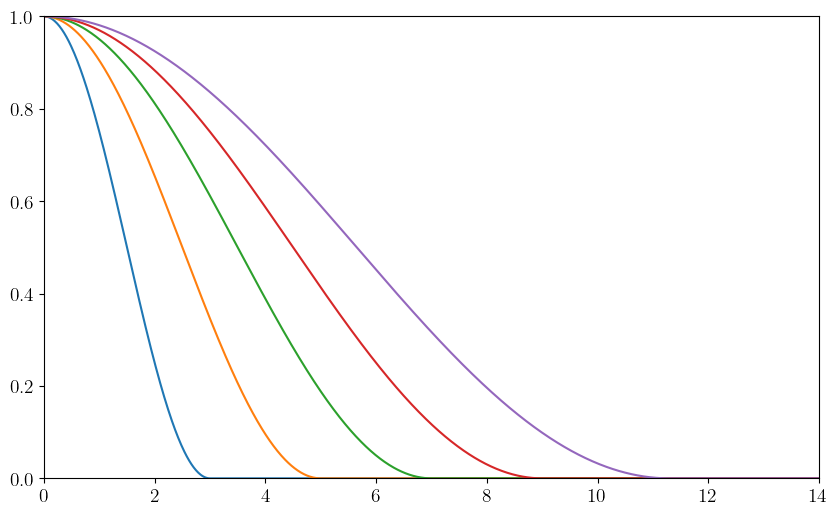

In [3]:
test_g1(rij)

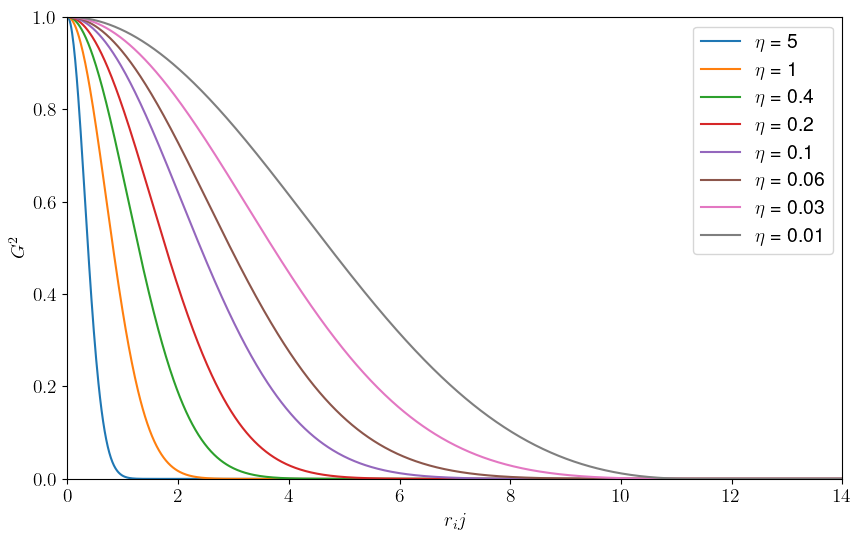

In [4]:
test_g2_eta(rij)

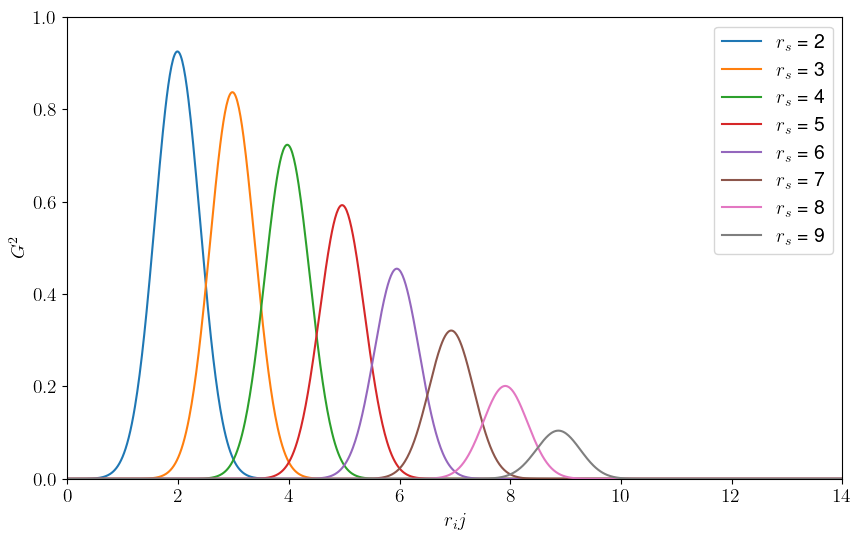

In [5]:
test_g2_rs(rij)

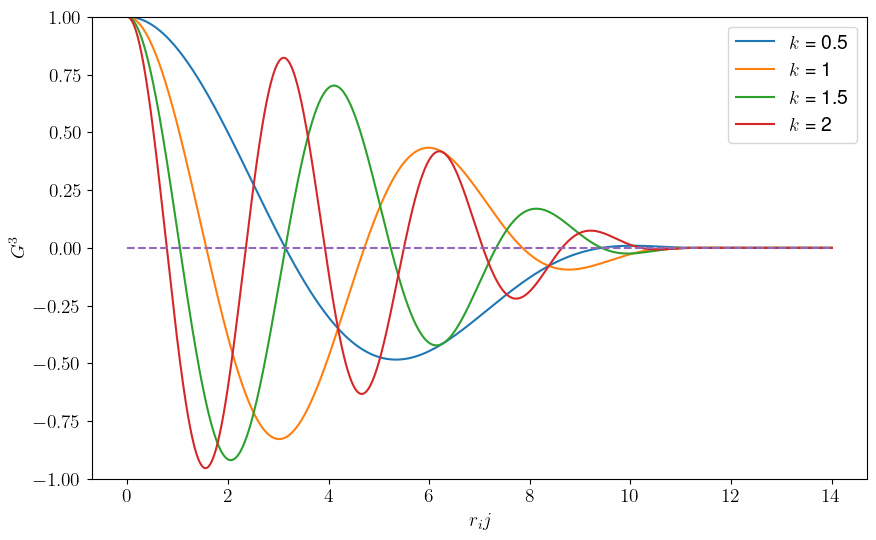

In [6]:
test_g3(rij)

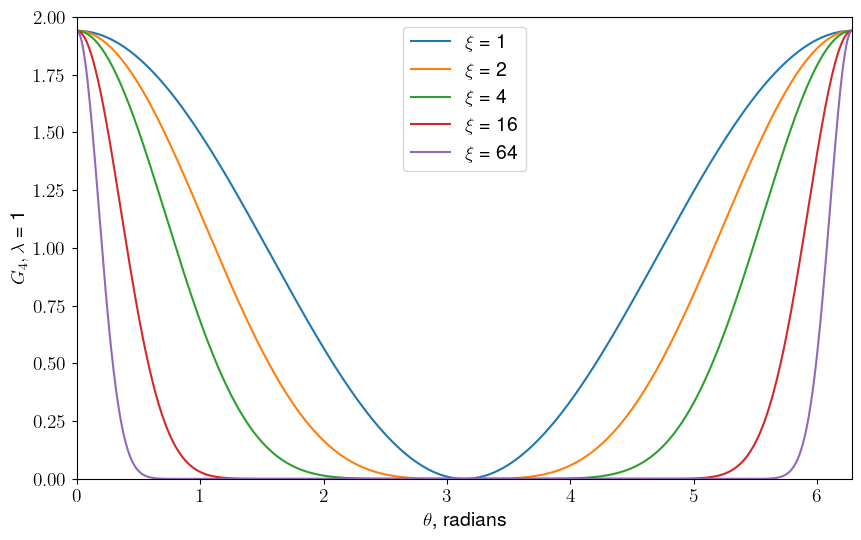

In [7]:
angles = np.linspace(0, 360, 1000) * np.pi / np.full(1000, 180) 
test_g4(angles, +1)

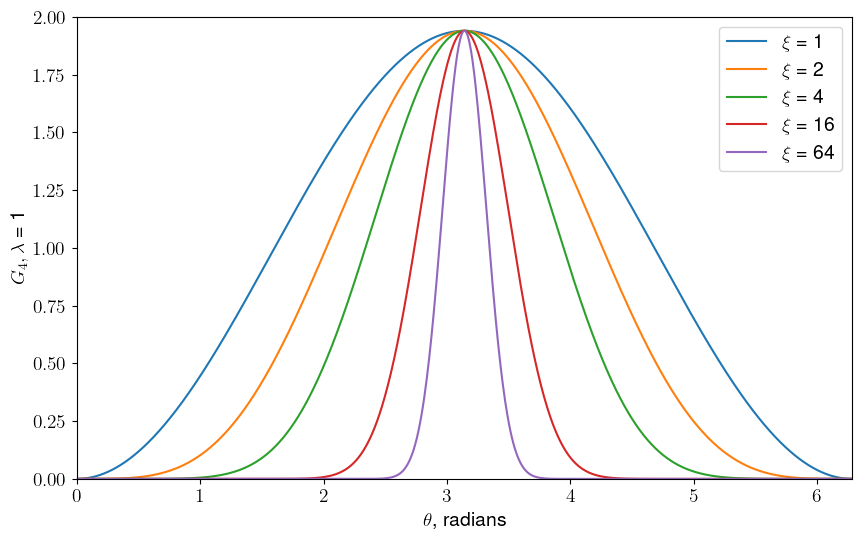

In [8]:
test_g4(angles, -1)